In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('Bank_ Loan dataset.csv')
df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000,N
1,Male,Yes,3000,66000,Y
2,Male,Yes,2583,120000,Y
3,Male,No,6000,141000,Y
4,Male,Yes,5417,267000,Y
...,...,...,...,...,...
572,Female,No,2900,71000,Y
573,Male,Yes,4106,40000,Y
574,Male,Yes,8072,253000,Y
575,Male,Yes,7583,187000,Y


In [3]:
df.shape

(577, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           577 non-null    object
 1   Married          577 non-null    object
 2   ApplicantIncome  577 non-null    int64 
 3   LoanAmount       577 non-null    int64 
 4   Loan_Status      577 non-null    object
dtypes: int64(2), object(3)
memory usage: 22.7+ KB


In [5]:
df.keys()

Index(['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Loan_Status'], dtype='object')

In [6]:
df.isnull().sum()

Gender             0
Married            0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

In [7]:
oh_enc = OneHotEncoder(sparse=False,)

In [8]:
oh_enc_arr = oh_enc.fit_transform(df[['Gender']])

oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [9]:
marged= pd.DataFrame(oh_enc_arr, columns=['male','female'])
marged

,male,female
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
572,1.0,0.0
573,0.0,1.0
574,0.0,1.0
575,0.0,1.0


In [10]:
df['Gender'] = marged[['male']].copy()

df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,0.0,Yes,4583,128000,N
1,0.0,Yes,3000,66000,Y
2,0.0,Yes,2583,120000,Y
3,0.0,No,6000,141000,Y
4,0.0,Yes,5417,267000,Y
...,...,...,...,...,...
572,1.0,No,2900,71000,Y
573,0.0,Yes,4106,40000,Y
574,0.0,Yes,8072,253000,Y
575,0.0,Yes,7583,187000,Y


In [11]:
df['Gender'] = marged[['female']].copy()

df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1.0,Yes,4583,128000,N
1,1.0,Yes,3000,66000,Y
2,1.0,Yes,2583,120000,Y
3,1.0,No,6000,141000,Y
4,1.0,Yes,5417,267000,Y


In [12]:
oh_enc_arr = oh_enc.fit_transform(df[['Married']])

oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [13]:
marged= pd.DataFrame(oh_enc_arr, columns=['Yes','No'])
marged

,Yes,No
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
572,1.0,0.0
573,0.0,1.0
574,0.0,1.0
575,0.0,1.0


In [14]:
df['Married'] = marged[['Yes']].copy()

df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1.0,0.0,4583,128000,N
1,1.0,0.0,3000,66000,Y
2,1.0,0.0,2583,120000,Y
3,1.0,1.0,6000,141000,Y
4,1.0,0.0,5417,267000,Y
...,...,...,...,...,...
572,0.0,1.0,2900,71000,Y
573,1.0,0.0,4106,40000,Y
574,1.0,0.0,8072,253000,Y
575,1.0,0.0,7583,187000,Y


In [15]:
df['Married'] = marged[['No']].copy()

df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1.0,1.0,4583,128000,N
1,1.0,1.0,3000,66000,Y
2,1.0,1.0,2583,120000,Y
3,1.0,0.0,6000,141000,Y
4,1.0,1.0,5417,267000,Y
...,...,...,...,...,...
572,0.0,0.0,2900,71000,Y
573,1.0,1.0,4106,40000,Y
574,1.0,1.0,8072,253000,Y
575,1.0,1.0,7583,187000,Y


In [16]:
oh_enc_arr = oh_enc.fit_transform(df[['Loan_Status']])

oh_enc_arr

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [17]:
marged= pd.DataFrame(oh_enc_arr, columns=['Y','N'])
marged

,Y,N
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
572,0.0,1.0
573,0.0,1.0
574,0.0,1.0
575,0.0,1.0


In [18]:
df['Loan_Status'] = marged[['Y']].copy()

df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1.0,1.0,4583,128000,1.0
1,1.0,1.0,3000,66000,0.0
2,1.0,1.0,2583,120000,0.0
3,1.0,0.0,6000,141000,0.0
4,1.0,1.0,5417,267000,0.0
...,...,...,...,...,...
572,0.0,0.0,2900,71000,0.0
573,1.0,1.0,4106,40000,0.0
574,1.0,1.0,8072,253000,0.0
575,1.0,1.0,7583,187000,0.0


In [19]:
df['Loan_Status'] = marged[['N']].copy()

df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1.0,1.0,4583,128000,0.0
1,1.0,1.0,3000,66000,1.0
2,1.0,1.0,2583,120000,1.0
3,1.0,0.0,6000,141000,1.0
4,1.0,1.0,5417,267000,1.0
...,...,...,...,...,...
572,0.0,0.0,2900,71000,1.0
573,1.0,1.0,4106,40000,1.0
574,1.0,1.0,8072,253000,1.0
575,1.0,1.0,7583,187000,1.0


In [20]:
df.update(df)
df.head()


,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,1.0,1.0,4583,128000,0.0
1,1.0,1.0,3000,66000,1.0
2,1.0,1.0,2583,120000,1.0
3,1.0,0.0,6000,141000,1.0
4,1.0,1.0,5417,267000,1.0


In [21]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
print('Shape of x=',x.shape)
print('Shape of y=',y.shape)

Shape of x= (577, 4)
Shape of y= (577,)


# Split data 

In [22]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=2020)
print('Shape of X_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (461, 4)
Shape of y_train =  (461,)
Shape of X_test =  (116, 4)
Shape of y_test =  (116,)


# StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
sc.fit(x_train)

StandardScaler()

# Support Vector classification

In [25]:
from sklearn.svm import SVC

In [26]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(x_train,y_train)

SVC()

In [27]:
classification_rbf.score(x_test,y_test)

0.6810344827586207

In [28]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [29]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(x_train_sc,y_train)
classification_rbf_2.score(x_test_sc,y_test)

0.6810344827586207

# Tune Parameter


In [30]:
model_c=SVC(C=5)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.6810344827586207

In [31]:
model_g=SVC(gamma=5)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

0.6810344827586207

In [32]:
classification_poly=SVC(kernel='poly',degree=2)
classification_poly.fit(x_train_sc,y_train)
classification_poly.score(x_test_sc,y_test)

0.6810344827586207

In [33]:
classification_linear=SVC(kernel='linear',degree=3)
classification_linear.fit(x_train_sc,y_train)
classification_linear.score(x_test_sc,y_test)

0.6810344827586207

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [35]:
Classifier=RandomForestClassifier(criterion='gini')
Classifier.fit(x_train, y_train)


RandomForestClassifier()

In [36]:
x_test


,Gender,Married,ApplicantIncome,LoanAmount
34,0.0,1.0,3667,144000
287,1.0,0.0,4000,140000
536,1.0,1.0,3166,104000
151,1.0,1.0,4167,158000
316,1.0,1.0,2500,176000
...,...,...,...,...
511,0.0,0.0,3652,95000
504,1.0,0.0,2550,126000
371,1.0,1.0,3100,113000
397,1.0,1.0,5829,138000


In [37]:
y_pred=Classifier.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.])

In [38]:
y_test.head()

34     1.0
287    1.0
536    0.0
151    1.0
316    1.0
Name: Loan_Status, dtype: float64

In [39]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [40]:
Classifier.score(x_test,y_test)

0.5948275862068966

# confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [42]:
cm=confusion_matrix(y_test,y_pred)


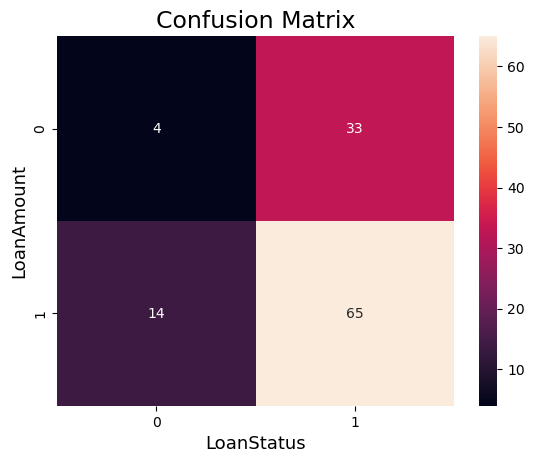

In [43]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('LoanAmount',fontsize=13)
plt.xlabel('LoanStatus',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [44]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.5948275862068966


In [45]:
precision=precision_score(y_test,y_pred,average='macro')
print(precision)


0.4427437641723356


In [46]:
recall=recall_score(y_test,y_pred,average='macro')
print(recall)


0.4654464591173452


In [47]:
f1_score=f1_score(y_test,y_pred,average='macro')
print(f1_score)


0.4399589111453518


# DecisionTreeClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
Classifier = DecisionTreeClassifier(criterion='gini')
Classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
x_test

,Gender,Married,ApplicantIncome,LoanAmount
34,0.0,1.0,3667,144000
287,1.0,0.0,4000,140000
536,1.0,1.0,3166,104000
151,1.0,1.0,4167,158000
316,1.0,1.0,2500,176000
...,...,...,...,...
511,0.0,0.0,3652,95000
504,1.0,0.0,2550,126000
371,1.0,1.0,3100,113000
397,1.0,1.0,5829,138000


In [51]:
Classifier.score(x_test,y_test)

0.5775862068965517

In [52]:
y_test.head()

34     1.0
287    1.0
536    0.0
151    1.0
316    1.0
Name: Loan_Status, dtype: float64